<h3>Multilayer Neural Network</h3>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from time import time

In [4]:
from tensorflow.python.keras.callbacks import TensorBoard

<h3>Importing Dataset</h3>

In [5]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

Using TensorFlow backend.


<h3>Normalization</h3>

In [6]:
X_train=X_train/255
X_test=X_test/255

<h3> Building the Architecture </h3>

In [7]:
model3=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])
model3.summary()
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


<h3> Compile </h3>

In [8]:
model3.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [9]:
history=model3.fit(X_train,y_train, epochs=5,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4808 - accuracy: 0.8275 - val_loss: 0.4535 - val_accuracy: 0.8338
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3637 - accuracy: 0.8669 - val_loss: 0.3860 - val_accuracy: 0.8597
Epoch 3/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3297 - accuracy: 0.8793 - val_loss: 0.3684 - val_accuracy: 0.8665
Epoch 4/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3087 - accuracy: 0.8850 - val_loss: 0.3507 - val_accuracy: 0.8739
Epoch 5/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2880 - accuracy: 0.8924 - val_loss: 0.3422 - val_accuracy: 0.8760


In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<h3>Graphs</h3>

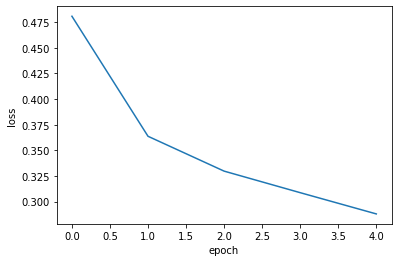

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


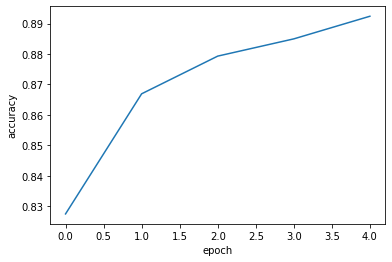

In [12]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


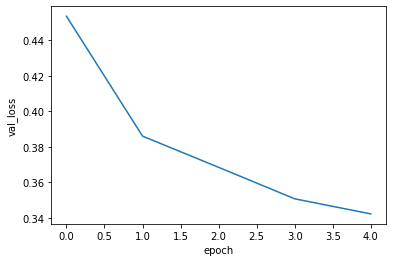

In [13]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

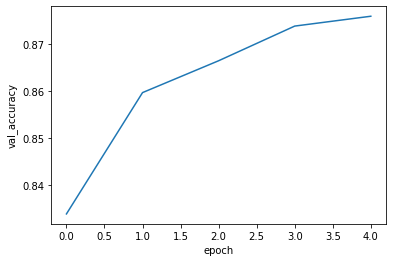

In [14]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()


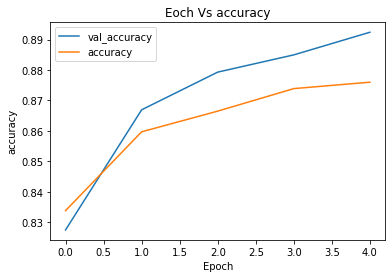

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.title("Eoch Vs accuracy")
plt.legend(['val_accuracy','accuracy'], loc='upper left')
plt.show()

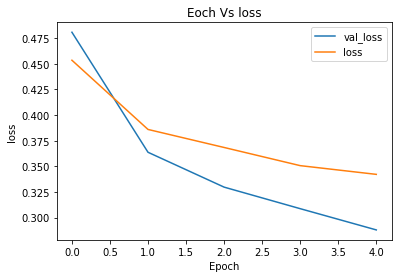

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.title("Eoch Vs loss")
plt.legend(['val_loss','loss'], loc='upper right')
plt.show()

In [17]:
test_loss,test_acc = model3.evaluate(X_test,y_test)
print(test_loss*100)
print(test_acc*100)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
predictions=model3.predict(X_test)
pred=[]
for i in range(len(X_test)):
    pred.append(np.argmax(predictions[i]))
confusion_matrix_final=confusion_matrix(y_test,pred)
print(confusion_matrix_final)

34.21529691696167
87.59999871253967
[[899   1   9  18   5   0  55   0  13   0]
 [  3 969   0  21   3   0   3   0   1   0]
 [ 27   2 674  10 199   0  83   0   5   0]
 [ 35   7   7 897  21   0  22   0  11   0]
 [  1   1  41  43 866   0  42   0   6   0]
 [  0   0   0   1   0 967   0  16   1  15]
 [184   0  53  27 105   0 610   0  21   0]
 [  0   0   0   0   0  25   0 953   1  21]
 [  3   0   1   4   3   5   2   3 979   0]
 [  1   0   0   0   0   7   1  45   0 946]]


<h3>CNN</h3>

In [19]:
import pandas as pd
import numpy as np
print(keras.__version__)
from keras.models import Sequential
from keras.layers import Input,Convolution2D, Flatten, Dense, Dropout
from keras.layers.pooling import MaxPooling2D
import tensorflow
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
logdir="logs/{}".format(time())
tensorboard_callback=keras.callbacks.TensorBoard(log_dir=logdir)


2.2.4-tf


In [20]:
from keras.utils import np_utils
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [21]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


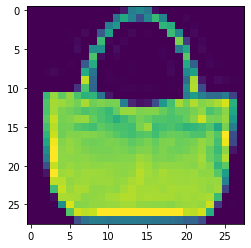

In [22]:
image=X_train[100,:].reshape((28,28))
plt.imshow(image)
plt.show()

In [23]:
image_rows=28
image_cols=28
batch_size=128
image_shape=(image_rows,image_cols,1)
print(image_shape)

(28, 28, 1)


In [24]:
cnn_model=Sequential([
    Convolution2D(filters=128,kernel_size=3,activation='relu',input_shape=image_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
    
])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,771,594
Trainable params: 2,771,594
Non-trainable params: 0
____________________________________________

In [25]:
cnn_model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy']
)

In [26]:
X_train=X_train.reshape(-1,28,28,1)
x_test=X_test.reshape(-1,28,28,1)

In [27]:
history=cnn_model.fit(X_train,y_train, epochs=5, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 159s 3ms/step - loss: 0.3661 - accuracy: 0.8705 - val_loss: 0.2926 - val_accuracy: 0.8916
Epoch 2/5
60000/60000 [==============================] - 156s 3ms/step - loss: 0.2492 - accuracy: 0.9075 - val_loss: 0.2628 - val_accuracy: 0.9058
Epoch 3/5
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2049 - accuracy: 0.9231 - val_loss: 0.2471 - val_accuracy: 0.9104
Epoch 4/5
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1704 - accuracy: 0.9358 - val_loss: 0.2480 - val_accuracy: 0.9138
Epoch 5/5
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1454 - accuracy: 0.9448 - val_loss: 0.2549 - val_accuracy: 0.9185


In [28]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


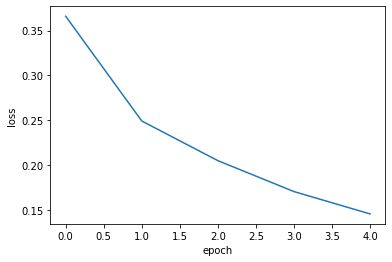

In [29]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

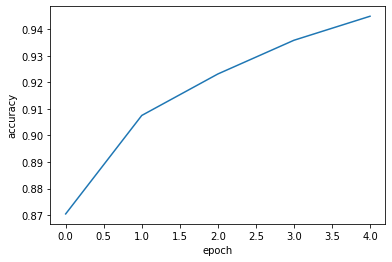

In [30]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


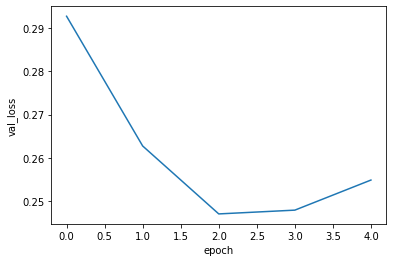

In [31]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

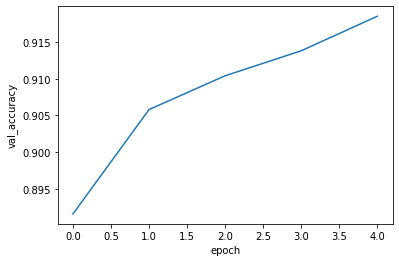

In [32]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

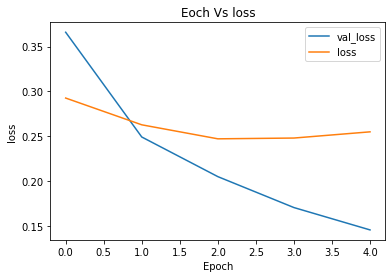

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.title("Eoch Vs loss")
plt.legend(['val_loss','loss'], loc='upper right')
plt.show()

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.title("Eoch Vs accuarcy")
plt.legend(['accuracy','val_accuracy'], loc='upper left')
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
predictions=model3.predict(X_test)
pred=[]
for i in range(len(X_test)):
  pred.append(np.argmax(predictions[i]))
confusion_matrix_final=confusion_matrix(y_test,pred)
print(confusion_matrix_final)

[[899   1   9  18   5   0  55   0  13   0]
 [  3 969   0  21   3   0   3   0   1   0]
 [ 27   2 674  10 199   0  83   0   5   0]
 [ 35   7   7 897  21   0  22   0  11   0]
 [  1   1  41  43 866   0  42   0   6   0]
 [  0   0   0   1   0 967   0  16   1  15]
 [184   0  53  27 105   0 610   0  21   0]
 [  0   0   0   0   0  25   0 953   1  21]
 [  3   0   1   4   3   5   2   3 979   0]
 [  1   0   0   0   0   7   1  45   0 946]]


<h3>Single layer Neural Network From Scratch</h3>

<h3>Encoding Labels</h3>

In [35]:
y_trainglobal = []
import numpy as np
array=np.zeros((y_train.shape[0],10))
for i in range(y_train.shape[0]):
    j=int(y_train[i])
    array[i,j]=1
    y_train1=array
    y_trainglobal=y_train1

In [36]:
#  # # Sigmoid Function
def sigmoid(z):
   return 1/(1+np.exp(-z))
#Softmax Function
def softmax(z2):
    return np.exp(z2)/np.sum(np.exp(z2),axis=0)

<h3>Intialization</h3>

In [37]:
output_layer=10
hidden_layer=128
learning_rate=0.07
m=len(X_train)
w1=np.random.randn(784,hidden_layer)
b1=np.random.randn(1,hidden_layer)
w2=np.random.randn(hidden_layer,10)
b2=np.random.randn(1,output_layer)

<h3>Implementation</h3>

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

loss_track=[]

for i in range(250):
    z1=np.dot(X_train, w1)+b1  
    a1=np.tanh(z1)  
    z2= np.dot(a1,w2) +b2 
    a2=softmax(z2)
    loss=-np.sum(np.multiply(y_train1,np.log(a2+0.01)))/m 
    loss_track.append(loss)
    dz2=a2-y_train1  
    dw2=((np.matmul(a1.T,dz2))/m)
    db2=(1/m)*(np.sum(dz2,axis=1,keepdims=True))
    da1=np.matmul(dz2,w2.T)
    dz1=sigmoid(z1)*(1-(sigmoid(z1)))*(da1)
    dw1=np.matmul(X_train.T,dz1)/m
    db1=(1/m)*(np.sum(dz1,axis=1,keepdims=True))
    w2=w2-(learning_rate*dw2)
    b2=b2- learning_rate*db2    
    w1=w1-learning_rate*dw1   
    b1=b1-learning_rate*db1     
#   print(loss, metrics.accuracy_score(np.argmax(y_trainglobal,axis=1),np.argmax(a2.T,axis=0))*100)
# print(np.argmax(y_trainglobal,axis=1).shape)
# print(np.argmax(a2.T,axis=0).T.shape)
# print(metrics.accuracy_score(np.argmax(y_trainglobal,axis=1),np.argmax(a2.T,axis=0)))

ValueError: shapes (60000,28,28,1) and (784,128) not aligned: 1 (dim 3) != 784 (dim 0)

In [ ]:
zt1=np.dot(X_train,w1)+ b1
at1 = sigmoid(zt1)
z2= np.dot(at1,w2)
at2=softmax(z2)
test_prediction = np.argmax(a2,axis=1).T
test_labels=np.argmax(y_trainglobal,axis=1).T
cf=confusion_matrix(test_prediction,test_labels)
print(cf)
count=0
for i in range(10):
    for j in range(10):
        if i==j:
            count+=cf[i][j]
accuracy = count/60000*100
# print(accuracy)

<h3>Graphs</h3>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_track)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Epoch Vs Loss")
# plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_track)
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.title("Epoch Vs accuracy")
# plt.show()